# SMAI Assignment - 2

## Question - `4` : Gaussian Naïve Bayes

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

This question will have you working and experimenting with the Gaussian Naïve Bayes classifier. Initially, you will calculate the priors and the parameters for the Gaussians. Then, you will use the likelihoods to classify the test data. Please note that use of `sklearn` implementations is only for the final question in the Experiments section.

The dataset is simple and interesting, the [Wireless Indoor Localization Data Set](https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization). An office has seven Wi-Fi routers and its signal strengths received from these routers categorize the location of the receiver (in one of four rooms). There are 7 attributes and a class label column that can take 4 values. The data is present in `wifiLocalization.txt`. It contains 2000 samples.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
# additional imports if necessary

### Estimate Gaussian parameters

Write a function to estimate the parameters of the Gaussian distribution.

In [2]:
# your code here
def Gaussian_parameters(X_train,y_train):
    # storing all the different classes.
    classes=np.unique(y_train)
    # means and stds of each class  for each feature.
    means_vec=np.full((len(classes),X_train.shape[1]), 0.0)
    std_vec=np.full((len(classes),X_train.shape[1]), 0.0)
    for col in range(X_train.shape[1]):
        class1_feature=[]
        class2_feature=[]
        class3_feature=[]
        class4_feature=[]
        for row in range(X_train.shape[0]):
            if(y_train[row] == 1):
                class1_feature.append(X_train[row][col])
            elif(y_train[row] == 2):
                class2_feature.append(X_train[row][col])
            elif(y_train[row] == 3):
                class3_feature.append(X_train[row][col])
            else:
                class4_feature.append(X_train[row][col])
        #mean for all the classes for respected feature(col).
        means_vec[0][col]=np.mean(class1_feature)
        means_vec[1][col]=np.mean(class2_feature)
        means_vec[2][col]=np.mean(class3_feature)
        means_vec[3][col]=np.mean(class4_feature)
        #std for all the classes for respected feature(col).
        std_vec[0][col]=np.var(class1_feature)
        std_vec[1][col]=np.var(class2_feature)
        std_vec[2][col]=np.var(class3_feature)
        std_vec[3][col]=np.var(class4_feature)
    return means_vec,std_vec

### Calculate priors

Write a function to calculate the priors for each class.

In [3]:
# Calculating probabilites for each class.
def get_priors(c1_count,c2_count,c3_count,c4_count):
    priors=[]
    priors.append(c1_count/(c1_count+c2_count+c3_count+c4_count))
    priors.append(c2_count/(c1_count+c2_count+c3_count+c4_count))
    priors.append(c3_count/(c1_count+c2_count+c3_count+c4_count))
    priors.append(c4_count/(c1_count+c2_count+c3_count+c4_count))
    return priors

### Likelihood + Classification

Given a test sample, write a function to get the likelihoods for each class in the sample. Use the Gaussian parameters and priors calculated above. Then compute the likelihood that the sample belongs to each class and return the class with the highest likelihood.

What is a common problem with the likelihoods? How can you fix it? Redo the classification with the fixed likelihoods. (You can either write another function or modify the existing one after mentioning the reason for the change)

#### Answere:

One common problem with likelihoods in Gaussian Naive Bayes is the issue of zero probabilities. This occurs when a feature value in the test data has not been observed in the training data. As a result, the probability of that feature value given the class becomes zero, which can lead to incorrect classification.

To fix this problem, we can use a technique called  smoothing, which adds a small constant value (usually 1) to all the feature values in the training data. This ensures that even if a feature value is not present in the training data, it still has a non-zero probability.

We can see the result in Task 03 before and after applying  smoothing 




In [4]:
# your code here
import math

def get_likelihood(prior_prob , class_ ,  X_test , row , means_vec , var_vec):
    features_prob = prior_prob 
    for col in range(X_test.shape[1]):
        mean=means_vec[class_][col]
        var=var_vec[class_][col]
        x=X_test[row][col]
        #Calculating guassian pdf value.
        features_prob *= (math.sqrt(2*np.pi*var)**-1) * np.exp(-0.5*(x-mean)**2/var)
    return features_prob

def redu_get_likelihood(prior_prob , class_ ,  X_test , row , means_vec , var_vec,a):
    features_prob = prior_prob 
    for col in range(X_test.shape[1]):
        mean=means_vec[class_][col]
        var=var_vec[class_][col]
        x=X_test[row][col]+a
        #Calculating guassian pdf value.
        features_prob *= (math.sqrt(2*np.pi*var)**-1) * np.exp(-0.5*(x-mean)**2/var)
    return features_prob

### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [5]:
data = pd.read_csv('wifiLocalization.txt', sep='\t')
data

,ws1,ws2,ws3,ws4,ws5,ws6,ws7,r
0,-47,-53,-54,-49,-63,-88,-85,3
1,-50,-57,-60,-43,-66,-77,-82,3
2,-44,-50,-57,-45,-61,-72,-67,2
3,-48,-59,-53,-45,-74,-81,-81,3
4,-60,-54,-59,-65,-66,-83,-84,1
...,...,...,...,...,...,...,...,...
1995,-47,-56,-54,-51,-63,-81,-86,3
1996,-46,-55,-48,-52,-62,-80,-79,3
1997,-36,-59,-55,-40,-65,-66,-69,2
1998,-60,-53,-52,-62,-50,-91,-88,4


### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

In [6]:
# Splitting Data in Train and Test
X=np.array(data.iloc[:,:-1])
y=np.array(data.iloc[:,-1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train.shape)
print(y_train.shape)

(1400, 7)
(1400,)


### Experiments

1. Estimate your model on the training data.
2. Plot the Gaussian probability density functions for each class after estimation.
3. Classify the test data using your model.
4. Pick a few samples from the test set that were misclassified and plot them along with the Gaussian probability density functions for each class. What do you observe?
5. Find if there are any features that are redundant. If so, remove them and repeat the experiments. How does the performance change?
6. Conversely, are there certain features that overpower the likelihood scores independently? Test this hypothesis empirically by only using hat/those feature(s) and repeating the experiments. How does the performance change?
7. Compare your results with the `scikit-learn` implementation. You can use the `GaussianNB` class from `sklearn.naive_bayes`. You can use the `score` function to get the accuracy of the model on the test set.
8. (Optional) Try other Naïve Bayes classifiers from [`sklearn.naive_bayes`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) and compare the results.

In [7]:
#  Task - 01 

# Calculate means and variance of each feature for each class...
means_vec,var_vec=Gaussian_parameters(X_train,y_train)

# Calculate priors
c1_count=np.count_nonzero(y_train == 1)
c2_count=np.count_nonzero(y_train == 2)
c3_count=np.count_nonzero(y_train == 3)
c4_count=np.count_nonzero(y_train == 4)
priors=get_priors(c1_count,c2_count,c3_count,c4_count)

def predict(X_test,priors , means_vec, var_vec):
    y_pred=[]
    # for each row predicting y.
    for row in range(X_test.shape[0]):
        # calculating probability for eeach class
        c1_prob=get_likelihood(priors[0],0, X_test, row , means_vec, var_vec)
        c2_prob=get_likelihood(priors[1],1, X_test, row , means_vec, var_vec)
        c3_prob=get_likelihood(priors[2],2, X_test, row , means_vec, var_vec)
        c4_prob=get_likelihood(priors[3],3, X_test, row , means_vec, var_vec)
        # selecting highest probability.
        mx_prob=max([c1_prob, c2_prob,c3_prob, c4_prob ])  
        # detecting the class.
        if(mx_prob == c1_prob):
            y_pred.append(1)
        elif(mx_prob == c2_prob):
            y_pred.append(2)
        elif(mx_prob == c3_prob):
            y_pred.append(3)
        else:
            y_pred.append(4)
    return y_pred

def predict_redu(X_test,priors , means_vec, var_vec,a):
    y_pred=[]
    # for each row predicting y.
    for row in range(X_test.shape[0]):
        # calculating probability for eeach class
        c1_prob=redu_get_likelihood(priors[0],0, X_test, row , means_vec, var_vec,a)
        c2_prob=redu_get_likelihood(priors[1],1, X_test, row , means_vec, var_vec,a)
        c3_prob=redu_get_likelihood(priors[2],2, X_test, row , means_vec, var_vec,a)
        c4_prob=redu_get_likelihood(priors[3],3, X_test, row , means_vec, var_vec,a)
        # selecting highest probability.
        mx_prob=max([c1_prob, c2_prob,c3_prob, c4_prob ])  
        # detecting the class.
        if(mx_prob == c1_prob):
            y_pred.append(1)
        elif(mx_prob == c2_prob):
            y_pred.append(2)
        elif(mx_prob == c3_prob):
            y_pred.append(3)
        else:
            y_pred.append(4)
    return y_pred


def accuracy(y_test, y_pred):
    acc=np.sum(y_test == y_pred)/len(y_test)
    return acc

# Estimating the  model on the training data.
y_pred_train=predict(X_train , priors , means_vec, var_vec)
print("Accuracy on train  : ",accuracy(y_train, y_pred_train))

Accuracy on train  :  0.9821428571428571


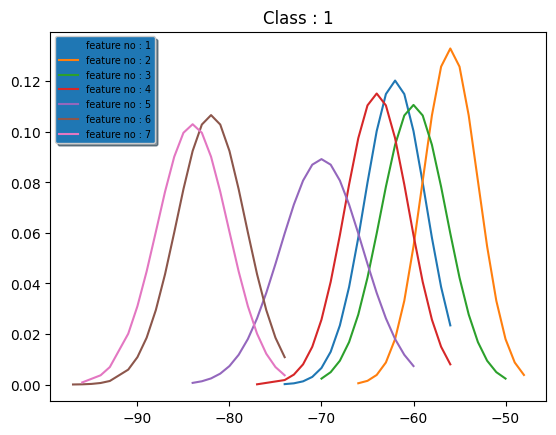

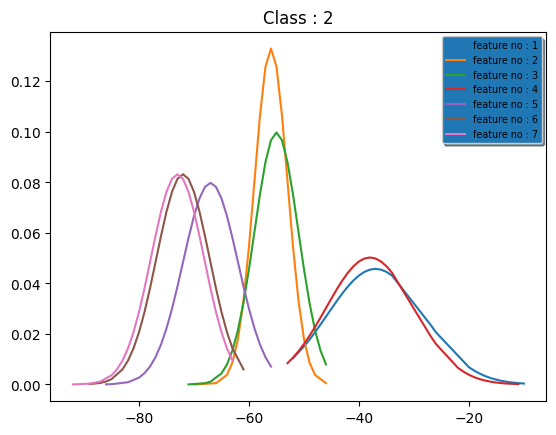

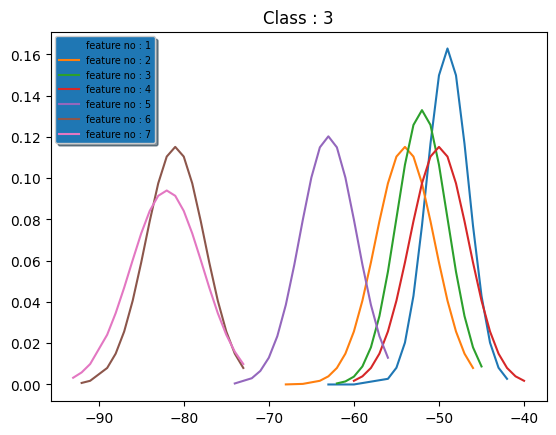

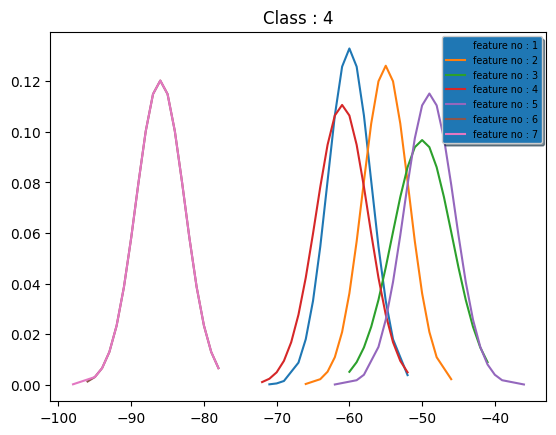

In [8]:
# Task - 02
# Ploting the Gaussian probability density functions for each class 
from scipy.stats import norm
import statistics
for class_no in range(4):
    fig, ax = plt.subplots()
    plt.title("Class : "+str(class_no+1)) 
    for feature_no in range(means_vec.shape[1]):
        x_axis=X_train[y_train == class_no+1][:,feature_no]
        x_axis=np.sort(x_axis)
        
        # Calculting mean and std of featur no of respected class.
        mean = statistics.mean(x_axis)
        sd = statistics.stdev(x_axis)
        plt.plot(x_axis, norm.pdf(x_axis, mean, sd), label="feature no : "+str(feature_no+1))
        legend = ax.legend( shadow=True, fontsize='x-small')
        
        # Put a nicer background color on the legend.
        legend.get_frame().set_facecolor('C0')

    

In [9]:
# Task - 03

# Classifying the test data in model.

y_pred=predict(X_test , priors , means_vec, var_vec)
print("Accuracy on test : ",accuracy(y_test, y_pred))


y_pred=predict_redu(X_test , priors , means_vec, var_vec,1)
print("Accuracy on test after Laplace smoothing : ",accuracy(y_test, y_pred))


Accuracy on test :  0.9883333333333333
Accuracy on test after Laplace smoothing :  0.9733333333333334


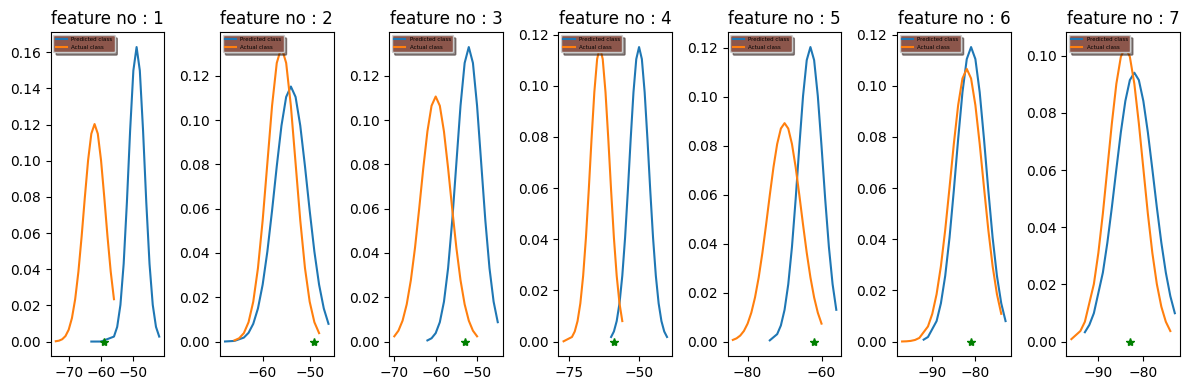

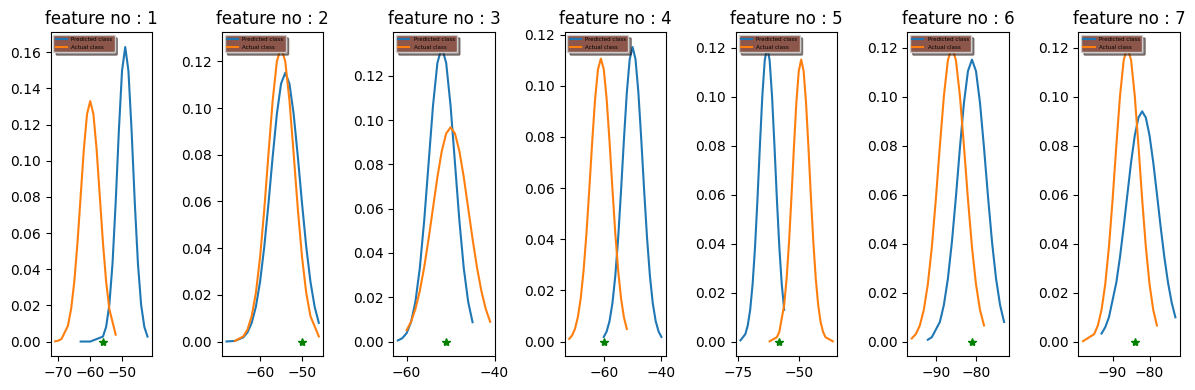

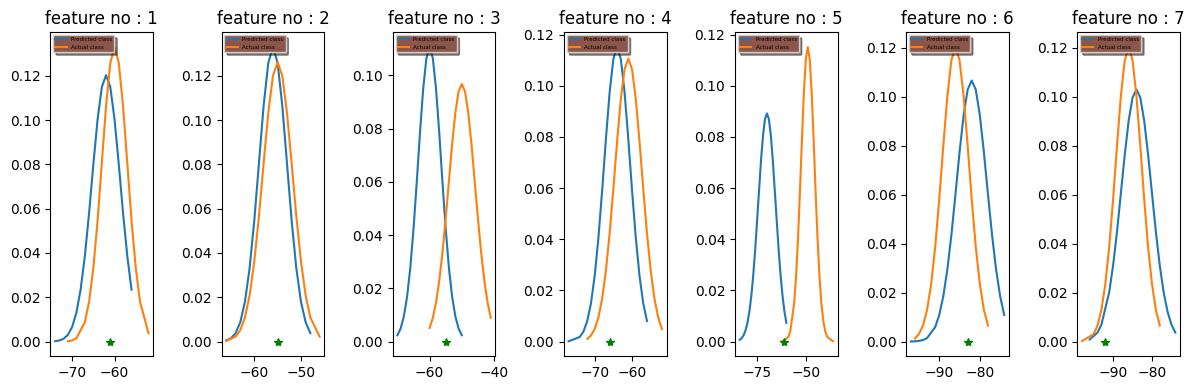

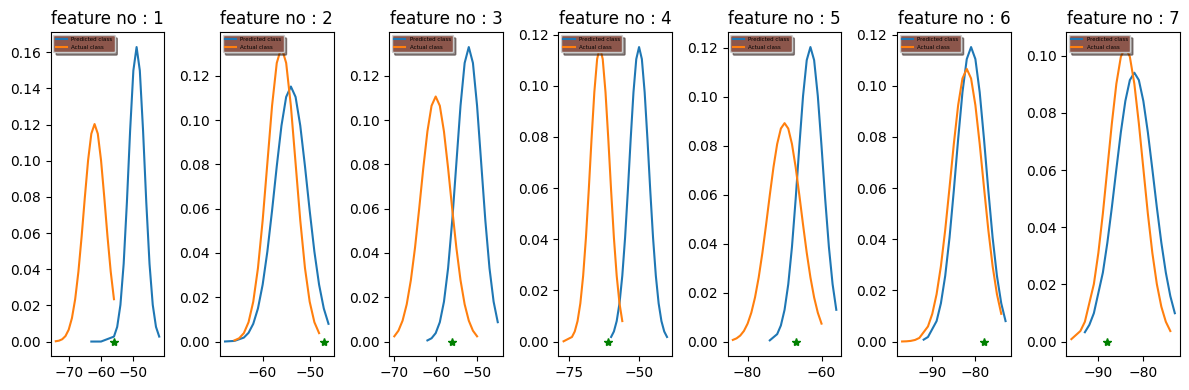

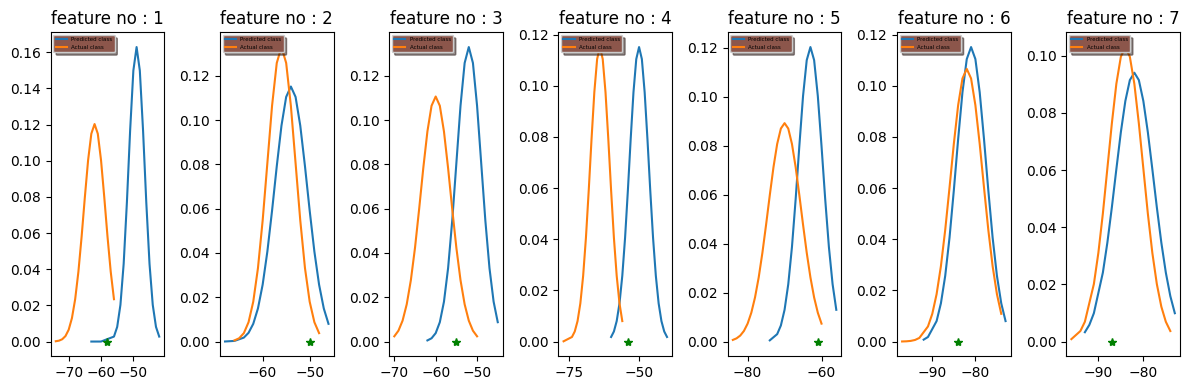

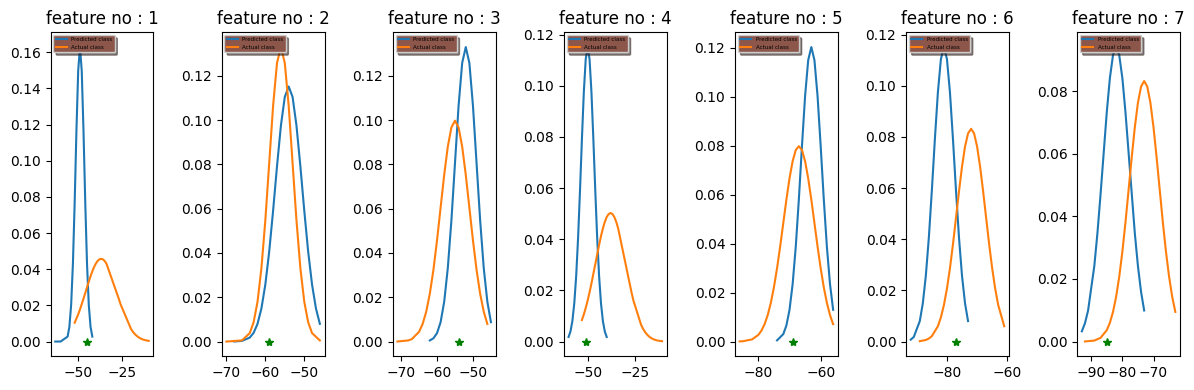

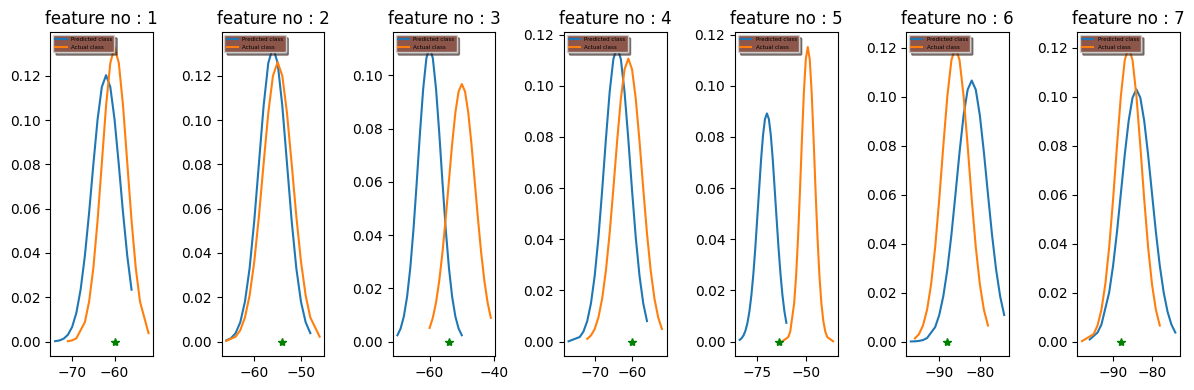

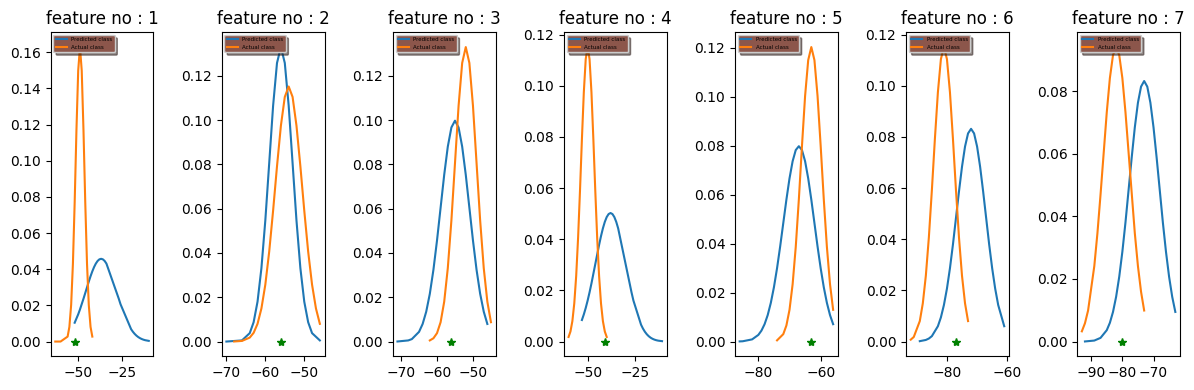

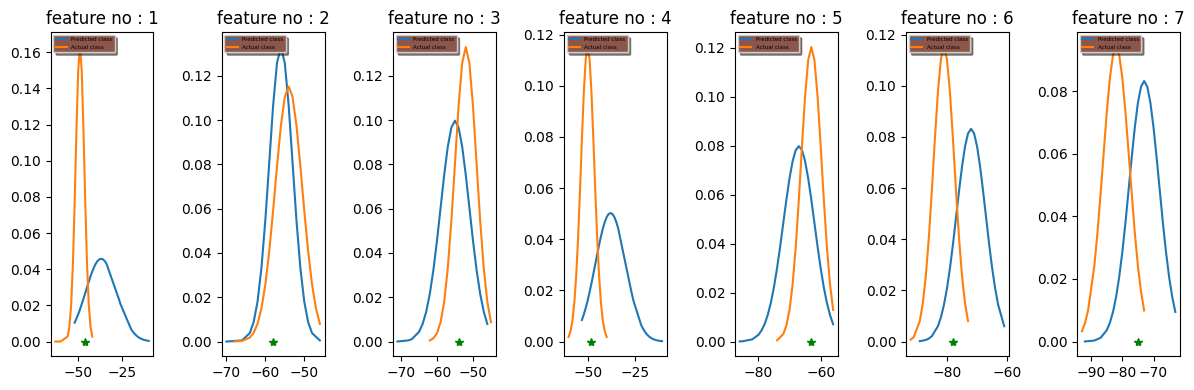

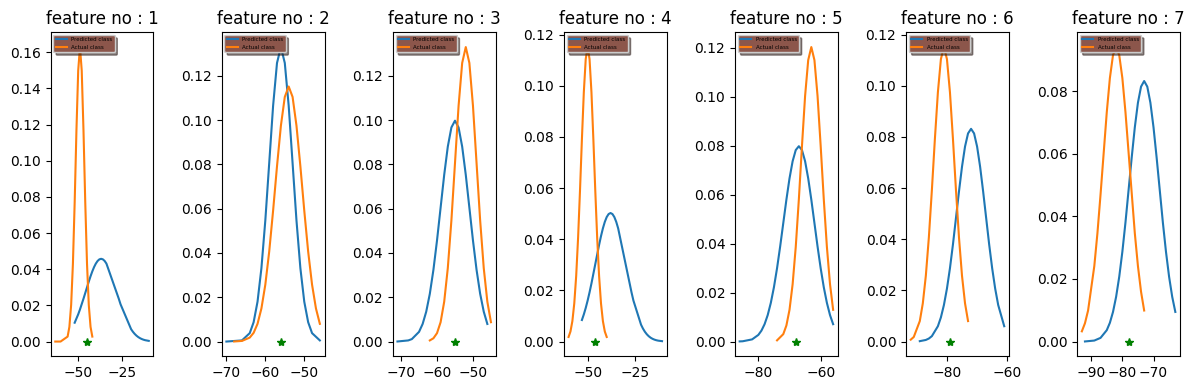

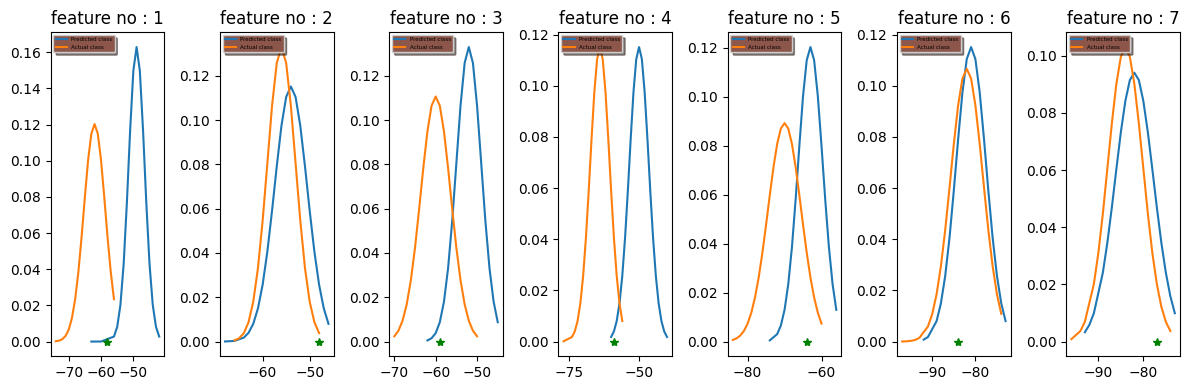

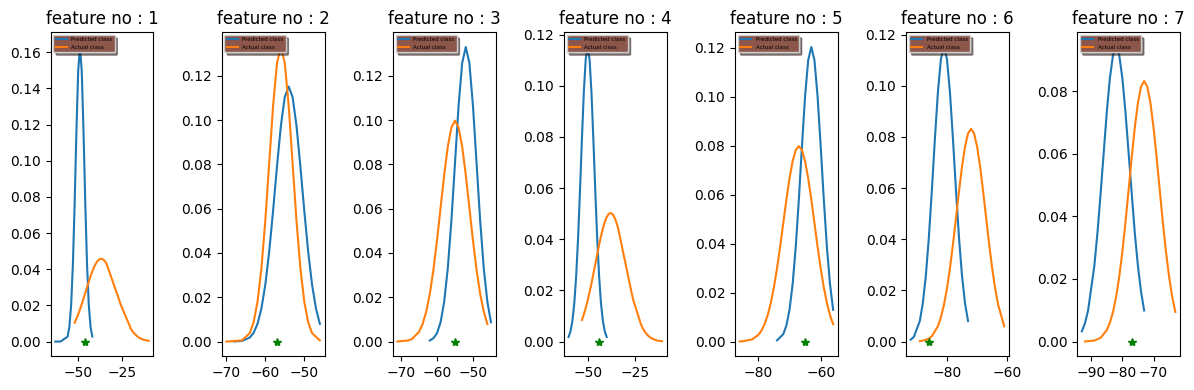

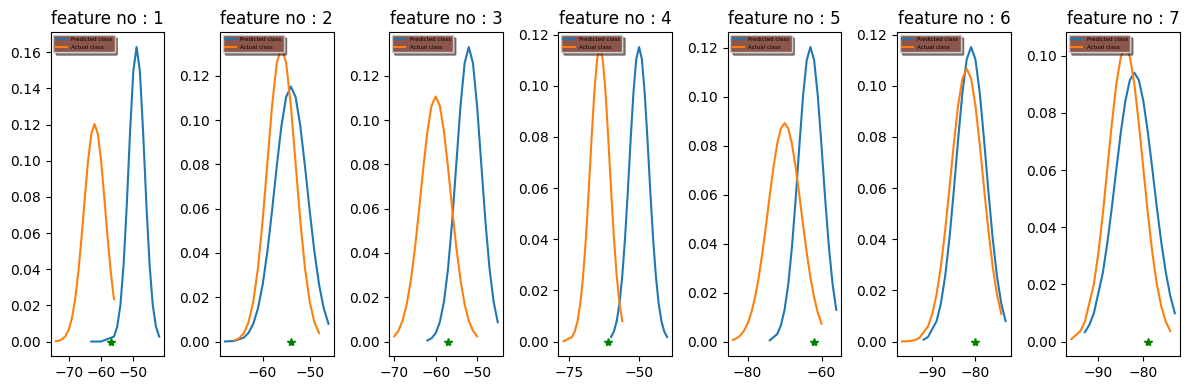

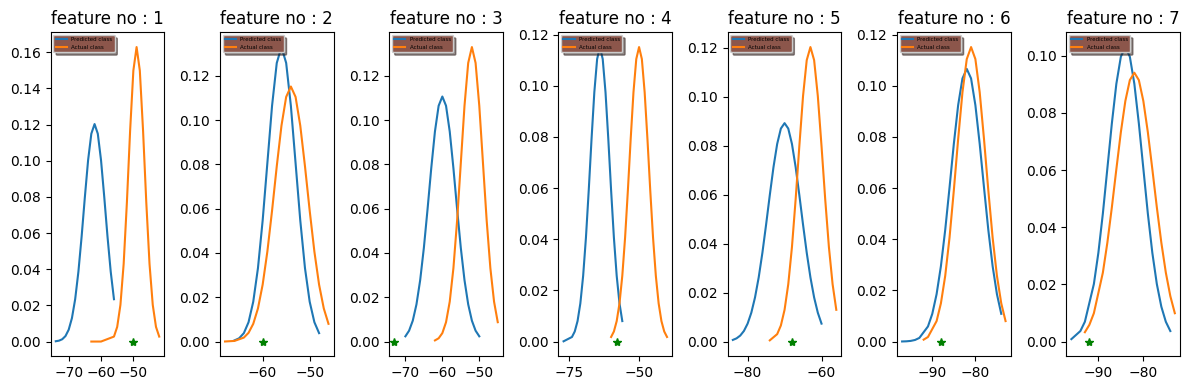

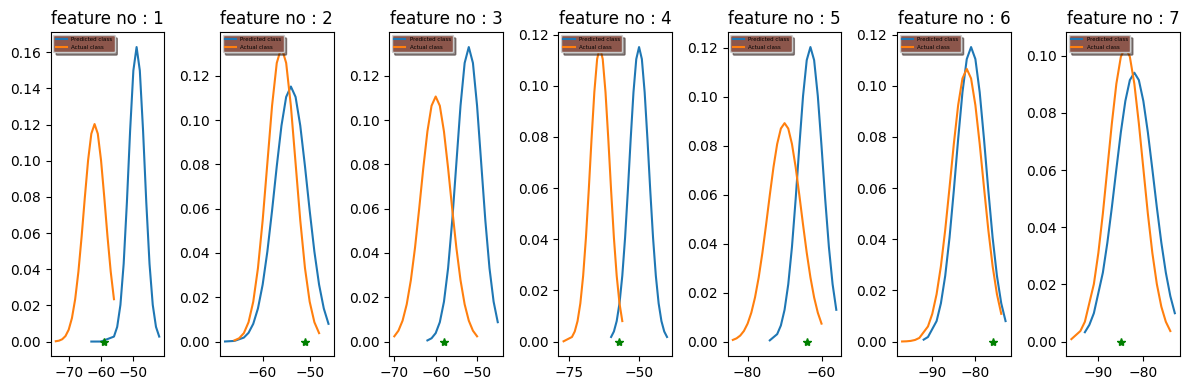

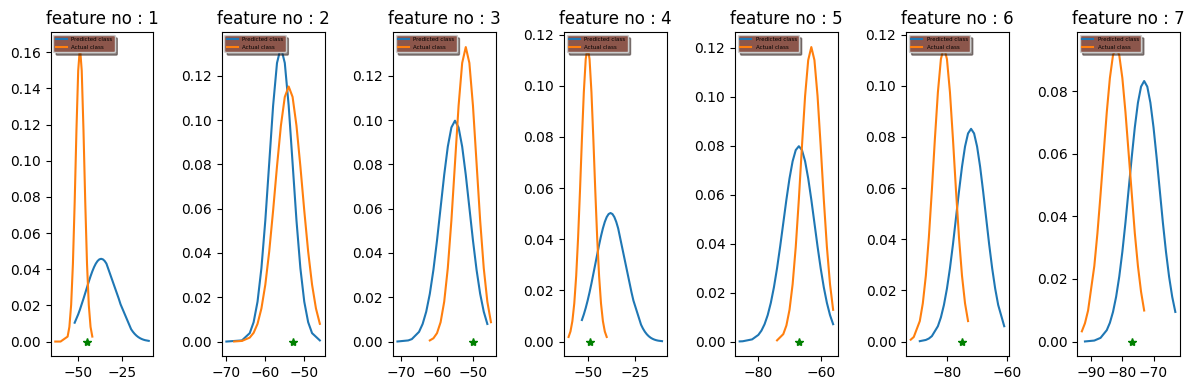

In [10]:
# Task - 04
x_misclassified = X_test[ y_pred != y_test]
y_misclassified = []
y_actual=[]
for i in range(len(y_pred)):
    if(y_pred[i]!=y_test[i]):
        y_misclassified.append(y_pred[i])
        y_actual.append(y_test[i])

y_misclassified=np.array(y_misclassified)
x_misclassified=np.array(x_misclassified)

for image_no in range(len(y_misclassified)): 
    fig, ax = plt.subplots(1,7,figsize=(12, 4))
    for feature_no in range(means_vec.shape[1]):
        
        ax[feature_no].set_title("feature no : "+str(feature_no+1))
        class_no=y_misclassified[image_no]
        x_axis=X_train[ y_train == class_no][:,feature_no]
        x_axis=np.sort(x_axis)
        mean = statistics.mean(x_axis)
        sd = statistics.stdev(x_axis)
        ax[feature_no].plot(x_axis, norm.pdf(x_axis, mean, sd), label="Predicted class")
        class_no=y_actual[image_no]
        x_axis=X_train[ y_train == class_no][:,feature_no]

        x_axis=np.sort(x_axis)
        mean = statistics.mean(x_axis)
        sd = statistics.stdev(x_axis)
        ax[feature_no].plot(x_axis, norm.pdf(x_axis, mean, sd), label="Actual class")
        
        ax[feature_no].plot(x_misclassified[image_no][feature_no], 0, 'g*')
        legend = ax[feature_no].legend( shadow=True, fontsize='4', loc='upper left')
        # Put a nicer background color on the legend.
        legend.get_frame().set_facecolor('C5')
    plt.tight_layout()
    plt.show

Based on the graph plotted for each feature, we can obsereve that classes are miss classified becouse on some features point is closer to the  norm of predicted label as compared to that of actual label.

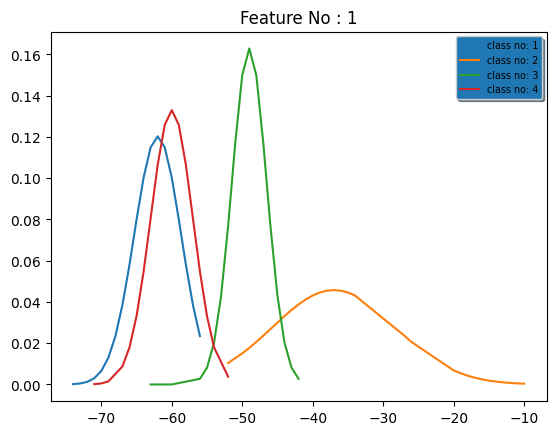

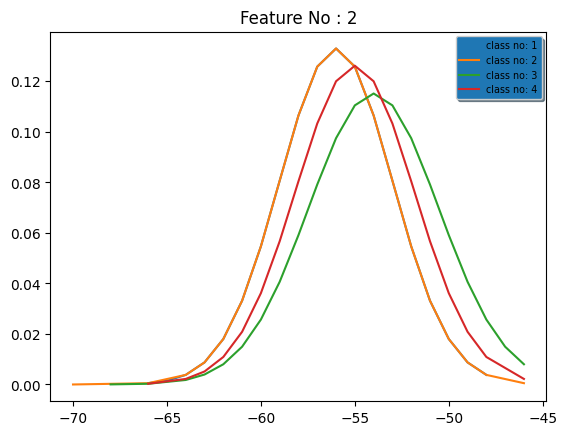

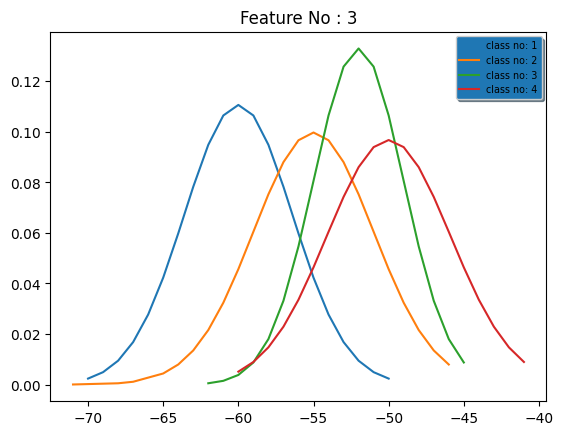

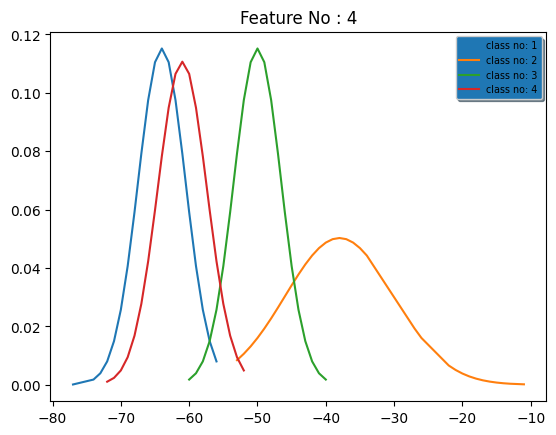

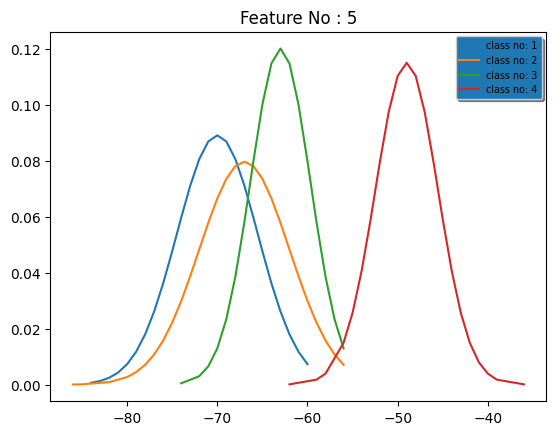

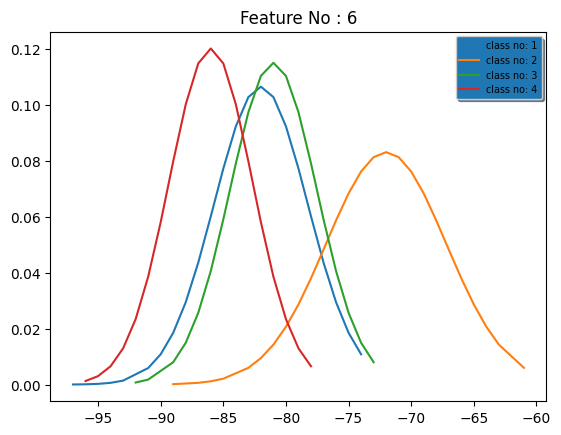

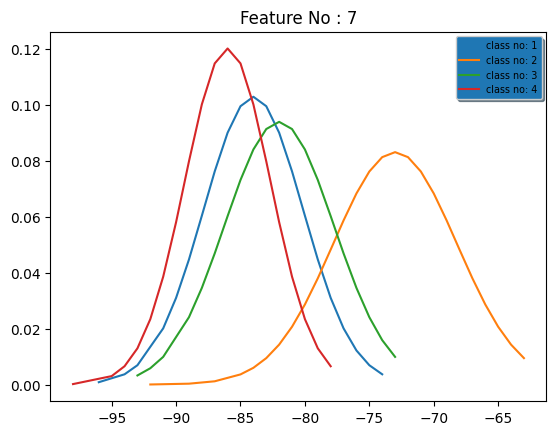

In [11]:
# Task - 05

# Experimenting to detect redundant feature then remove.
for feature_no in range(means_vec.shape[1]):
    fig, ax = plt.subplots()
    plt.title("Feature No : "+str(feature_no+1))
    for class_no  in range(4):
        x_axis=X_train[y_train == class_no+1][:,feature_no]
        x_axis=np.sort(x_axis)
        # calculating mean and std of respected class fo feature no.
        mean = statistics.mean(x_axis)
        sd = statistics.stdev(x_axis)
        plt.plot(x_axis, norm.pdf(x_axis, mean, sd), label="class no: "+str(class_no+1))
        legend = ax.legend( shadow=True, fontsize='x-small')
        # Put a nicer background color on the legend.
        legend.get_frame().set_facecolor('C0')

Based on the graphs formed, we can see the feature number 2 is seems redundant becouse It will not distinghuis  with different classes. So after removing feature 2, we can se no change or very low  changes in the accuracy  

In [12]:

def get_likelihood_red(prior_prob , class_ ,  X_test , row , means_vec , var_vec,f):
    features_prob = prior_prob 
    for col in range(X_test.shape[1]):
        # ignoring the feature f.
        if(col == f):
            continue
        mean=means_vec[class_][col]
        var=var_vec[class_][col]
        x=X_test[row][col]
        features_prob *= (math.sqrt(2*np.pi*var)**-1) * np.exp(-0.5*(x-mean)**2/var)
    return features_prob


def predict_without_red(X_test,priors , means_vec, var_vec,f):
    y_pred=[]
    for row in range(X_test.shape[0]):
        c1_prob=get_likelihood_red(priors[0],0, X_test, row , means_vec, var_vec,f)
        c2_prob=get_likelihood_red(priors[1],1, X_test, row , means_vec, var_vec,f)
        c3_prob=get_likelihood_red(priors[2],2, X_test, row , means_vec, var_vec,f)
        c4_prob=get_likelihood_red(priors[3],3, X_test, row , means_vec, var_vec,f)
        mx_prob=max([c1_prob, c2_prob,c3_prob, c4_prob ])    
        if(mx_prob == c1_prob):
            y_pred.append(1)
        elif(mx_prob == c2_prob):
            y_pred.append(2)
        elif(mx_prob == c3_prob):
            y_pred.append(3)
        else:
            y_pred.append(4)
    return y_pred

y_pred=predict_without_red(X_test , priors , means_vec, var_vec,1)

print("Accuracy after removing second feature : ",accuracy(y_test, y_pred))

Accuracy after removing second feature :  0.9883333333333333


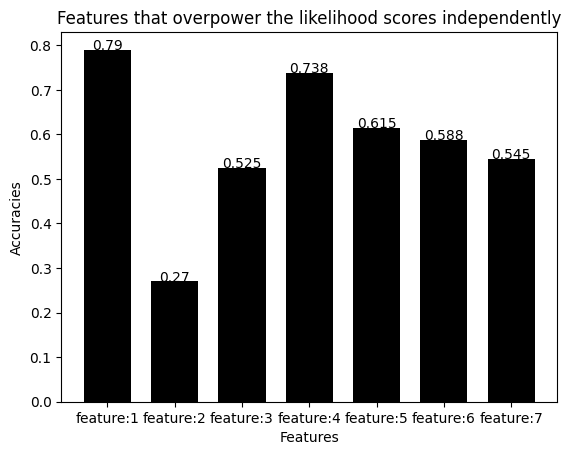

In [13]:
# Task - 06
def get_likelihood_overpower(prior_prob , class_ ,  X_test , row , means_vec , var_vec,f):
    features_prob = prior_prob 
    for col in range(X_test.shape[1]):
        # considuring only feature f.
        if(col != f):
            continue
        mean=means_vec[class_][col]
        var=var_vec[class_][col]
        x=X_test[row][col]
        features_prob *= (math.sqrt(2*np.pi*var)**-1) * np.exp(-0.5*(x-mean)**2/var)
    return features_prob


def predict_without_overpower(X_test,priors , means_vec, var_vec,f):
    y_pred=[]
    for row in range(X_test.shape[0]):
        c1_prob=get_likelihood_overpower(priors[0],0, X_test, row , means_vec, var_vec,f)
        c2_prob=get_likelihood_overpower(priors[1],1, X_test, row , means_vec, var_vec,f)
        c3_prob=get_likelihood_overpower(priors[2],2, X_test, row , means_vec, var_vec,f)
        c4_prob=get_likelihood_overpower(priors[3],3, X_test, row , means_vec, var_vec,f)
        mx_prob=max([c1_prob, c2_prob,c3_prob, c4_prob ])    
        if(mx_prob == c1_prob):
            y_pred.append(1)
        elif(mx_prob == c2_prob):
            y_pred.append(2)
        elif(mx_prob == c3_prob):
            y_pred.append(3)
        else:
            y_pred.append(4)
    return y_pred

features=[]
bar_labels=[]
Accuracies=[]
for feature_no in range(X_test.shape[1]):
    y_pred=predict_without_overpower(X_test , priors , means_vec, var_vec,feature_no)
    features.append(feature_no+1)
    Accuracies.append(accuracy(y_test, y_pred))
    bar_labels.append("feature:"+str(feature_no+1))
    
for i in range(len(features)):
        plt.text(i+1, float("{:.3f}".format(Accuracies[i])),float("{:.3f}".format(Accuracies[i])), ha = 'center')

plt.bar(features,Accuracies,tick_label=bar_labels,width=0.7,color=['black'])

plt.xlabel('Features')
plt.ylabel('Accuracies')
plt.title("Features that overpower the likelihood scores independently")
plt.show()

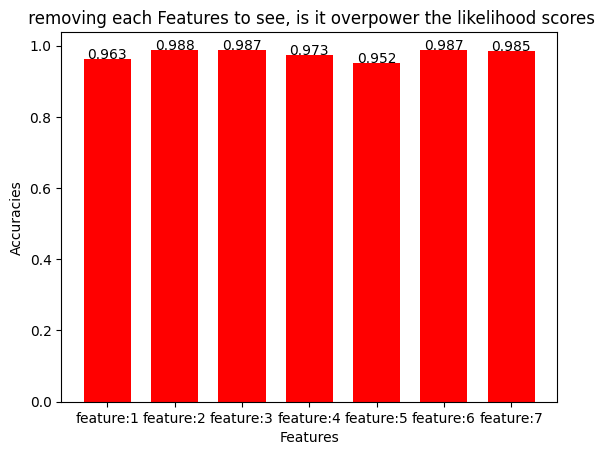

In [14]:
features=[]
bar_labels=[]
Accuracies=[]
for f in range(X_test.shape[1]):
    y_pred=predict_without_red(X_test , priors , means_vec, var_vec,f)
    features.append(f+1)
    Accuracies.append(accuracy(y_test, y_pred))
    bar_labels.append("feature:"+str(f+1))
    
plt.bar(features,Accuracies,tick_label=bar_labels,width=0.7,color=['red'])
for i in range(len(features)):
        plt.text(i+1, float("{:.3f}".format(Accuracies[i])),float("{:.3f}".format(Accuracies[i])), ha = 'center')

plt.xlabel('Features')
plt.ylabel('Accuracies')
plt.title(" removing each Features to see, is it overpower the likelihood scores")
plt.show()   

The performance of the classifier using only the identified feature(1) is likely to be lower than the classifier using all features because it has access to less information about the input data. if the identified feature(s) are highly correlated with the target variable, the performance may still be reasonably good (just like here is 79% ).


In [15]:
# Task - 07
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Naive Bayes score: ",nb.score(X_test, y_test))

Naive Bayes score:  0.9883333333333333
